# Multinomial Naive Bayes Notes

Noah Rubin 

Self Study- December 2020

---

#### Main Ideas:

* Naive Bayes is a simple classification algorithm that makes use of [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) in making predictions
* The algorithm takes a document $d$ as input, as well as a fixed set of classes $C = \{c_1, c_2, ..., c_j\}$ (assuming $j$ classes). The algorithm outputs the predicted class for that predicted document such that $\gamma(d) = c$, in which $\gamma$ is our classifier which takes in input $d$ and outputs $c \in C$
* In the case of [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis), the class can be the positive or negative class
* Naive bayes ultimatelty relies the on a simple concept known as the [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) representation
* The bag of words representation does not consider the ordering of the words or the font in the document, but instead just considers the set of words and their counts (and is why the algorithm is naive)

Sources used:
* https://www.youtube.com/channel/UC5zx8Owijmv-bbhAK6Z9apg
* https://web.stanford.edu/~jurafsky/slp3/4.pdf (best resource)

![bag_of_words](bag_of_words.png)

---

#### Math Details:

For a document $d$ and a class $c \in C$, we can use Bayes' theorem to calculate the [conditional probability](https://www.mathsisfun.com/data/probability-events-conditional.html) of a particular class given a particular document such that:

$$P(c|d) = \frac{P(d|c)P(c)}{P(d)}$$

The most likely class ('maximum a posteriori' aka MAP) that we are looking to assign a document to answers the question "out of all classes $c \in C$, what class maximises the probability that class given a document?", represented formally as:

$$C_{MAP} = \underset{c \in C}{\operatorname{argmax}} P(c|d)$$

Utilising Bayes' Theorem 

$$C_{MAP} = \underset{c \in C}{\operatorname{argmax}} \frac{P(d|c)P(c)}{P(d)}$$

Removing the denominator as traditionally done in Bayesian classification we get:

$$C_{MAP} = \underset{c \in C}{\operatorname{argmax}} P(d|c)P(c)$$

Dropping the denominator is acceptable since the probability of a document $P(d)$ is a constant. Here, $P(d|c)$ is the likelihood and $P(c)$ is the prior. Representing the document as a whole set of features $x_1, x_2, ..., x_n$, we get:

$$C_{MAP} = \underset{c \in C}{\operatorname{argmax}} P(x_1, x_2, ..., x_n |c)P(c)$$

#### Dissecting these two pieces

The quantity $P(c)$ answers the question of "how often does this class occur?" This can be done by counting the relative frequencies in a [corpus](https://www.tutorialspoint.com/natural_language_processing/natural_language_processing_linguistic_resources.htm). The first term is more complicated to compute, hence we make some simplifying assumptions. The first assumption is the **Bag of Words assumption** and assumes the position of the words in the document does not matter. The second assumption is **conditional independence** which assumes that the feature probabilities $P(x_i|c_j)$ are independent given the class $c$. Becuase we assume independence to simplify the problem (i.e. we don;t care about any dependencies between $x_1$ and $x_2$ etc.), we can now say that:

$$P(x_1, x_2, .., x_n|c) = P(x_1|c) \cdot P(x_2|c) \cdot ... \cdot P(x_n|c)$$

For the [Multinomial Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB), with these assumoptions in mind, we can now compute the best class (considering the Naive Bayes assumptions) as:

$$C_\text{Naive Bayes} = \underset{c \in C}{\operatorname{argmax}} P(c_j)\displaystyle \prod_{x \in X}^{} P(x | c)$$

in which $P(c_j)$ is the prior probability of the class. But now for every feature in the set of features, we are going to multiply the probability of that feature given the class.

If we look specifically at text data, consider `positions = all word positions in the text document`:

$$C_\text{Naive Bayes} = \underset{c_j \in C}{\operatorname{argmax}} P(c_j)\displaystyle \prod_{i \in positions}^{} P(x_i | c_j)$$

So we look at all the classes and for each class and ask what is the probability of the class (i.e $P(c_j)$), and then for each class, we walk through every position in the text and for each position we are going to look at the word in that position and ask what is its probability given the class we are currently looking at.

---

#### How are the parameters learned in the Multinomial Naive Bayes Model?

The intuitive way to learn the parameters for the Multinomial Naive Bayes Model is to consider maximum likelihood estimates where we simply use the frequencies in the data. So if we wish to predict the prior probability of a particular document being in a class $j$ we can use:

$$\hat{P}(c_j) = \frac{\text{Number of documents in class j}}{\text{Total number of documents}}$$

For the likelihood, the probability of $word_i$ given $class_j$ is given as:

$$\hat{P}(w_i|c_j)=\frac{count(w_i, c_j)}{\sum_{w \in Vocabulary}count(w, c_j)} = \frac{\text{The number of times word i occurs in documents of class j}}{\text{total number of words in class j}}$$

# BUT

Using maximum likelihood ultimately breaks down when using Multinomial Naiive Bayes. Consider we have a word in the test set but not in the training set. For the likelihood component of the equation (above), the numerator becomes 0, hence the entire quantity becomes zero. Hence when we look at the fact that $C_{MAP} = \text{most likely class} = argmax_c \hat{P}(c) \prod_{i} {\hat{P}(x_i|c)}$, if one of those likelihood terms are zero, $C_{MAP}$ becomes zero too and we will never pick that class.

---

#### The Solution

The solution is to add a [Laplace/Lidstone smoothing parameter](https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece#:~:text=Laplace%20smoothing%20is%20a%20smoothing%20technique%20that%20helps%20tackle%20the,the%20positive%20and%20negative%20reviews.). Scikit-learn sets this parameter $\alpha$ to 1.0 by default (Laplace smoothing), though it is a hyperparameter that can be tuned and can take on values less than one (Lidstone smoothing). When smoothing occurs, we get modified equations of:



$$\hat{P}(w_i|c_j) = \frac{\text{(The number of times word i occurs in documents of class j)}+\alpha}{\text{total number of words in class j} + \alpha|Vocabulary|}$$ since we added $\alpha$ for every vocabulary item (denominator).

---

#### Summary so far

**Pseudocode for calculating each of the $P(c_j)$ terms:**

for each $c_j$ in C do:

    * Create a variable docs_j = [all documents with class = c_j]
    * Assign P(c_j) = |docs_j|/total number of documents

**Pseudocode for calculating each of the $P(w_k|c_j)$ terms:**

Create a variable text_j = single mega document containing all docs_j

for each word w_k in Vocabulary do:

    * Create a variable n_k = number of occurences of w_k in text_j
    * Assign P(w_k | c_j) = (n_k + alpha)/n + alpha|Vocabulary|
    
---
    
#### Unknown Words

Normally the equation follows the form

$$\hat{P}(w_i|c_j) = \frac{\text{(The number of times word i occurs in documents of class j)}+\alpha}{\text{total number of words in class j} + \alpha|Vocabulary|}$$ 

But since we have an unknown word, the brackets in the numerator is zero and the denominator needs to take into account one extras word of vocabulary, thus:

$$\hat{P}(w_\text{unknown}|c_j) = \frac{\alpha}{\text{total number of words in class j} + \alpha|Vocabulary + 1|}$$



#### A simple example

Suppose we have four training observations (each representing a document) and an observation in the test set, outlined below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Text</th>
      <th>Class</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Chinese Beijing Chinese</td>
      <td>c</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Chinese Chinese Shanghai</td>
      <td>c</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Chinese Macao</td>
      <td>c</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Tokyo Japan Chinese</td>
      <td>j</td>
    </tr>
  </tbody>
</table>

and a test set with one row of data:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Text</th>
      <th>Class</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Chinese Chinese Chinese Tokyo Japan</td>
      <td>?</td>
    </tr>
  </tbody>
</table>

First, if we compute the priors, we get:

$$\hat{P}(\text{class}_c) = \frac{3}{4}$$

$$\hat{P}(\text{class}_j) = \frac{1}{4}$$

If we use Laplace Smoothing $(\alpha = 1)$, we get the following likelihood calculations:

$P(\text{Chinese}|c) = \frac{5+1}{8 + 1|6|} = \frac{3}{7}$

$P(\text{Chinese}|j) = \frac{1 + 1}{3 + 1|6|} = \frac{2}{9}$

$P(\text{Tokyo}|c) = \frac{0 + 1}{8 + 1|6|} = \frac{1}{14}$

$P(\text{Tokyo}|j) = \frac{1 + 1}{3 + 1|6|} = \frac{2}{9}$

$P(\text{Japan}|c) = \frac{0+1}{8+1|6|} = \frac{1}{14}$

$P(\text{Japan}|j) = \frac{1 + 1}{3 + 1|6|} = \frac{2}{9}$

---

For our test set, given our only document (document 5) we compute the probability of being in class $c$ and class $j$ and pick whichever one was higher.

Using the following formula form earlier: 
$$C_\text{Naive Bayes} = \underset{c_j \in C}{\operatorname{argmax}} P(c_j)\displaystyle \prod_{i \in positions}^{} P(x_i | c_j)$$

Hence:

$P(c|\text{document 5}) \propto \frac{3}{4} * \frac{3}{7} * \frac{3}{7} * \frac{3}{7} * \frac{1}{14} * \frac{1}{14} \approx 0.0003$

$P(j|\text{document 5}) \propto \frac{1}{4} * \frac{2}{9} * \frac{2}{9} * \frac{2}{9} * \frac{2}{9} * \frac{2}{9} \approx 0.0001$

Hence the model would predict Chinese since 0.0003 > 0.0001.

The $\propto$ (proportional to) symbol is there since we omit the denominator (mentioned earlier) which is a constant. More about that [here, around the 5:30 mark](https://www.youtube.com/watch?v=j1uBHvL6Yr0&list=PLLssT5z_DsK8HbD2sPcUIDfQ7zmBarMYv&index=29)

---

#### Advantages

* It is simple and easy to implement
* It doesn’t require as much training data
* It handles both continuous and discrete data
* It is highly scalable with the number of predictors and data points
* It is fast and can be used to make real-time predictions
* It is not sensitive to irrelevant features 

#### Disadvantages

* Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.


# Code
* A simple example involving spam detection relating to emails
* The data set is pretty evenly distributed with examples relating to 'spam' and 'ham' (no severe imbalance)

Sources:
* [Count Vectorizer](https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c)
* [ROC Curves and AUC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code.-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

%config InlineBackend.figure_format = 'svg'

In [ ]:
df = pd.read_csv('detect_spam.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1157 non-null   object
 1   Message   1157 non-null   object
dtypes: object(2)
memory usage: 18.2+ KB
None


,Category,Message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


#### Check for duplicated rows

In [ ]:
# No duplicated rows
df.loc[df.duplicated()]

,Category,Message


#### Check what values $y$ takes and see how balanced or imbalanced the class distribution is

In [ ]:
df['Category'].value_counts(normalize=True)

spam    0.554019
ham     0.445981
Name: Category, dtype: float64

#### Look for missing values

In [ ]:
# No missing values
df.isna().sum()

Category    0
Message     0
dtype: int64

#### Dummy encode the dependent variable (before splitting into train and test, which is a bit unideal)
* Sklearn pipelines don't seem to support transformations of $y$ yet
* Will have to just do it in pandas

In [ ]:
# Dummy encoding 1 for spam, 0 for ham
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

#### Split into train and test sets

In [ ]:
X = df.drop('Category', axis='columns')
y = df.Category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

#### Create a preprocessing and model building pipeline

In [ ]:
# Apply count vectorizer to the message column
text_preprocessing = Pipeline(steps=[('count_vect', CountVectorizer())])
full_preprocessing = ColumnTransformer(transformers=[('text_preprocessing', text_preprocessing, 'Message')])

# After applying the count vectoriser build the naive bayes model
full_pipeline = Pipeline(steps=[('preprocessing', full_preprocessing), ('model', MultinomialNB())])

#### Hyperparameter tuning

In [ ]:
# Alpha hyperparameter for Lidstone and Laplace smoothing
param_grid = {'model__alpha': np.linspace(0.001, 1, 100)}

# Search iover the specified parameter space
grid_search = GridSearchCV(full_pipeline, param_grid, scoring='f1', cv=10).fit(X_train, y_train)

#### Get best scores after 10 fold cross validation

In [ ]:
# Get 10 best mean_test_scores and see what the alpha parameter was for each of them
results = pd.DataFrame(grid_search.cv_results_)
results[['mean_test_score', 'params', 'rank_test_score']].sort_values(by='rank_test_score').head(10)

,mean_test_score,params,rank_test_score
10,0.967417,{'model__alpha': 0.10190909090909092},1
9,0.967417,{'model__alpha': 0.09181818181818183},1
11,0.967417,{'model__alpha': 0.112},1
19,0.966445,{'model__alpha': 0.19272727272727275},4
18,0.966445,{'model__alpha': 0.18263636363636365},4
17,0.966445,{'model__alpha': 0.17254545454545456},4
16,0.966445,{'model__alpha': 0.16245454545454546},4
15,0.966445,{'model__alpha': 0.15236363636363637},4
14,0.966445,{'model__alpha': 0.14227272727272727},4
13,0.966445,{'model__alpha': 0.13218181818181818},4


#### Build final model

In [ ]:
final_model = grid_search.best_estimator_.fit(X_train, y_train)

#### Generate predictions

In [ ]:
y_pred = final_model.predict(X_test)

#### Make a prediction

In [ ]:
def make_prediction(model, sentence):
    """Wrapper for the `predict` method in sklearn"""
    observation = pd.DataFrame({'Message':[sentence]})
    prediction = model.predict(observation)
    if prediction == 1:
        return 'Spam email'
    else:
        return 'Ham email'

# Call the function
email = 'Congratulations! You have been chosen as the winner of our PAYPAL survey. Our entire team warmly congratulates you! Click here to claim your prize'
make_prediction(final_model, email)

'Spam email'

#### Model evaluation

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       103
           1       0.95      0.95      0.95       129

    accuracy                           0.94       232
   macro avg       0.94      0.94      0.94       232
weighted avg       0.94      0.94      0.94       232



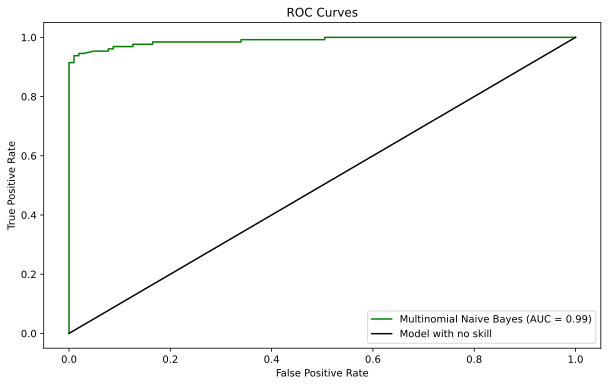

In [ ]:
# ROC Curve and AUC
predicted_probabilities = final_model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, predicted_probabilities)
auc = round(roc_auc_score(y_test, predicted_probabilities), 2)

# Plot ROC curve and display AUC score
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(title='ROC Curves', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax.plot(false_positive_rate, true_positive_rate, color='green', label=f'Multinomial Naive Bayes (AUC = {auc})')
ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='black', label='Model with no skill')

ax.legend();